Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [16]:
import pandas as pd 
# Load data from Part 1 and Part 2 stored in local drive as CSV files
# Load Yelp dataframe
df_yelp = pd.read_csv('C:\\Users\\affuy\\Documents\\Data_Sets\\df_Yelp.csv')

# Load Foursquare dataframe 
df_foursquare = pd.read_csv(r'C:\Users\affuy\Documents\Data_Sets\df_foursquare.csv')

# Join the DataFrames using concat (vertical stacking)
combined_df = pd.concat([df_yelp, df_foursquare], axis=0)
#combined_df.head(4)

In [4]:
combined_df.shape

(14, 12)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

We used a bar chart to visualize the distribution of different types of establishments in your dataset for several reasons:

Categorical Data: In your dataset, the "type" column represents the type of each establishment. Categorical data consists of distinct categories or labels, making it suitable for visualization using bar charts.

Understanding Composition: The primary objective was to understand the composition of your dataset. Specifically, we wanted to know how many establishments belonged to each category or type (e.g., "Restaurant," "Bar," "Nightclub," etc.).

#### This chart will show the average ratings for each category of businesses (e.g., Cafeteria) in the DataFrame.

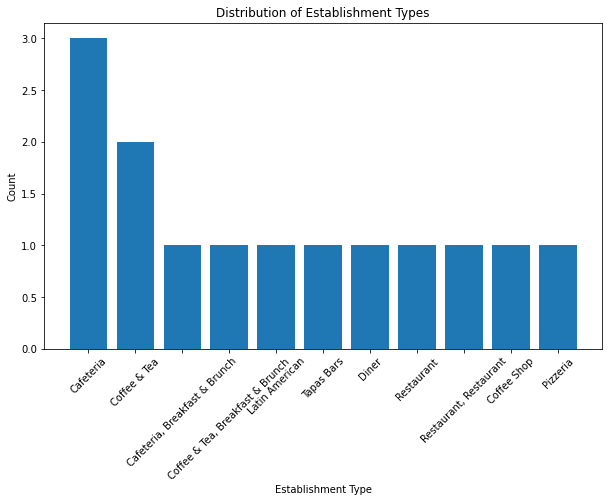

In [5]:
import matplotlib.pyplot as plt

# Count the occurrences of each establishment type
type_counts = combined_df['Categories'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(type_counts.index, type_counts.values)
plt.xlabel('Establishment Type')
plt.ylabel('Count')
plt.title('Distribution of Establishment Types')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

##### This histogram shows the distribution of ratings, which can help you understand the overall sentiment of the reviews.

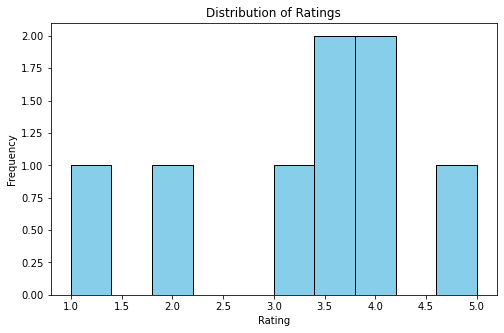

In [8]:
import matplotlib.pyplot as plt

# Create a histogram of ratings
plt.figure(figsize=(8, 5))
plt.hist(combined_df['Rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


##### This chart will show the average ratings for each category of businesses (e.g., Cafeteria) in the DataFrame.

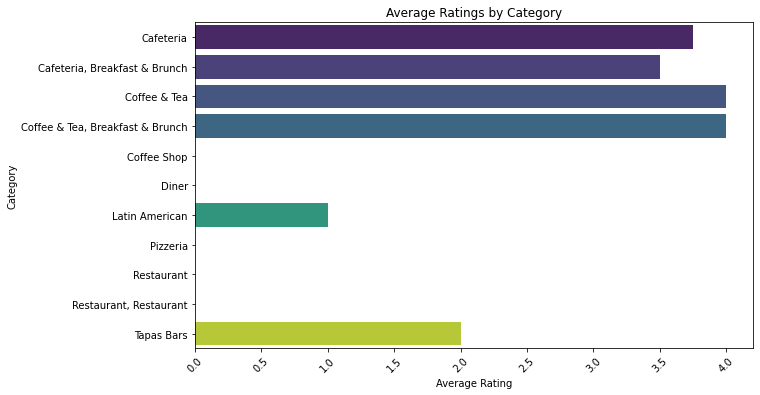

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Categories' and calculate the average rating for each category
avg_ratings_by_category = combined_df.groupby('Categories')['Rating'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Categories', data=avg_ratings_by_category, palette='viridis')
plt.title('Average Ratings by Category')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()


##### This scatter plot will show the locations of the businesses on a map, with the color of the points representing their ratings.

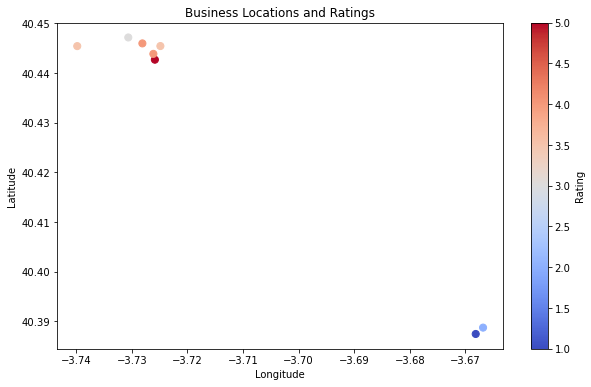

In [9]:
import matplotlib.pyplot as plt

# Create a scatter plot for latitude and longitude
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['Longitude'], combined_df['Latitude'], c=combined_df['Rating'], cmap='coolwarm', s=50)
plt.title('Business Locations and Ratings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Rating')
plt.show()


In [12]:
combined_df.to_csv(r'C:\Users\affuy\Documents\Data_Sets\combined_df.csv')


# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [20]:
import sqlite3
# connection = sqlite3.connect('combined_df.sqlite')

# Connect to the SQLite database (it will be created if it doesn't exist)
db_path = r'C:\Users\affuy\Documents\Data_Sets\mydata.db'
conn = sqlite3.connect(db_path)


In [21]:
# Assuming you want to store combined_df in the database
combined_df.to_sql('combined_data', conn, if_exists='replace', index=False)




14

In [29]:
# read city bikes
df_2 = pd.read_csv('C:\\Users\\affuy\\Documents\\Data_Sets\\df_2.csv')

# Store citybikes dataframe in the database
df_2.to_sql('df_2_data', conn, if_exists='replace', index=False)



394

In [22]:
# Assuming you want to store combined_df in the database
df_yelp.to_sql('Yelp_data', conn, if_exists='replace', index=False)




8

In [23]:
# Assuming you want to store combined_df in the database
df_foursquare.to_sql('foursquare_data', conn, if_exists='replace', index=False)
conn.close()



Look at the data before and after the join to validate your data.

In [24]:
import sqlite3

# Connect to the database
db_path = r'C:\Users\affuy\Documents\Data_Sets\mydata.db'
conn = sqlite3.connect(db_path)

# SQL query to select the top 5 records from the combined_data table
query_before_join = "SELECT * FROM combined_data LIMIT 5"

# Execute the query and fetch the results
results_before_join = conn.execute(query_before_join).fetchall()

# Print the results
for row in results_before_join:
    print(row)

# Close the database connection
conn.close()


('Vc4RIVJO1H3fEVSxKhEyIQ', 'Cafeteria', 616.451917392791, 40.445423556744, -3.72487552464008, 'Plaza Ramón y Cajal, s/n, 28040 Madrid, Spain', 'Madrid', 'Cafetería Facultad Farmacia', 3.5, None, None, None)
('BRA1z3dUr3mydVH3GGGmdQ', 'Coffee & Tea', 799.1398549876889, 40.4426762535961, -3.7258655215993, 'Avenida Complutense, 28040 Madrid, Spain', 'Madrid', 'Cafetería Facultad de Odontologia', 5.0, None, None, None)
('eQb3XqyhyuhFjeJWVZXIVw', 'Cafeteria', 388.33599526245183, 40.4459555491884, -3.72811395674944, 'Avenida Complutense, S/N, 28040 Madrid, Spain', 'Madrid', 'Cafetería de la Facultad de Ciencias de la Información', 4.0, None, None, None)
('ihZ_5G2_q0-QpDHZO0bJBw', 'Cafeteria, Breakfast & Brunch', 692.0053725418055, 40.44541, -3.73983, 'Ciudad Universitaria, Carretera M-30, 28040 Madrid, Spain', 'Madrid', 'Cafetería de la Facultad de Filosofía UCM', 3.5, None, None, None)
('F-yMUss08kAYNMFQ5pzvFw', 'Coffee & Tea, Breakfast & Brunch', 675.9723400501939, 40.4438465047558, -3.726

In [31]:
import sqlite3

# Connect to the database
db_path = r'C:\Users\affuy\Documents\Data_Sets\mydata.db'
conn = sqlite3.connect(db_path)

# SQL query to select the top 5 records after joining combined_data with df_2_data on latitude and longitude
query_after_join = """
SELECT combined_data.*, df_2_data.*
FROM combined_data
JOIN df_2_data ON 
    combined_data.Latitude = df_2_data.Latitude AND
    combined_data.Longitude = df_2_data.Longitude
LIMIT 5
"""

# Execute the query and fetch the results
results_after_join = conn.execute(query_after_join).fetchall()

# Print the results
for row in results_after_join:
    print(row)

# Close the database connection
conn.close()


(0, 17, "{'address': 'Calle Miguel Moya nº 1,', 'light': 'yellow', 'number': '2', 'online': True, 'slots': 27, 'uid': 1406}", 10, '82e78d26829a2dc89122e8f0988e2a28', 40.4205886, -3.7058415, '2 - Miguel Moya', '2023-09-05T01:44:12.473000Z', 0, 17, "{'address': 'Calle Miguel Moya nº 1,', 'light': 'yellow', 'number': '2', 'online': True, 'slots': 27, 'uid': 1406}", 10, '82e78d26829a2dc89122e8f0988e2a28', 40.4205886, -3.7058415, '2 - Miguel Moya', '2023-09-05T01:44:12.473000Z')
(1, 9, "{'address': 'Plaza del Conde del Valle de Súchil nº 3,', 'light': 'yellow', 'number': '3', 'online': True, 'slots': 19, 'uid': 1407}", 10, '248a049595da65f6aada65476ca1f958', 40.4302937, -3.7069171, '3 - Plaza Conde Suchil', '2023-09-05T01:44:12.638000Z', 1, 9, "{'address': 'Plaza del Conde del Valle de Súchil nº 3,', 'light': 'yellow', 'number': '3', 'online': True, 'slots': 19, 'uid': 1407}", 10, '248a049595da65f6aada65476ca1f958', 40.4302937, -3.7069171, '3 - Plaza Conde Suchil', '2023-09-05T01:44:12.6380